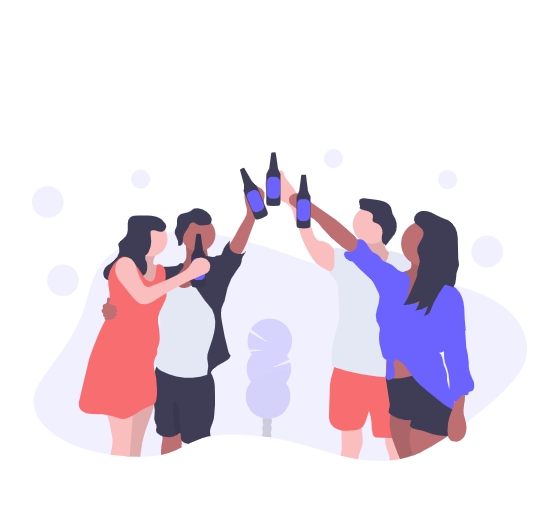
K-평균 군집화는 저번에 올린 주성분 분석과 같이 쓰기가 좋다.

-   K-평균 군집화로 그룹을 분류
-   주성분 분석으로 차원을 축소해 시각화

**0\. K-평균 군집화 기초**

K-평균 군집화는 전체 데이터를 K개의 그룹으로 나눈다.

주어진 조건이 없다면 K개로 그룹을 나누는 방법은 무한히 많다.

따라서 K-평균 군집화에는 다음과 같은 기준이 주어진다.

-   각 그룹의 중심과 개별 데이터 간의 거리가 최대한 짧게 하라

위 기준 덕분에 K-평균 군집화의 결과 조밀하게 모여있는 그룹을 얻을 수 있다.

**1\. 데이터 불러오기**

이번 예시에서는 Kaggle에서 데이터를 가져왔다.

[https://www.kaggle.com/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

[

Breast Cancer Wisconsin (Diagnostic) Data Set

Predict whether the cancer is benign or malignant

www.kaggle.com



](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

캐글 데이터를 받는 방법은 아래 블로그를 참고했다.

[https://han-py.tistory.com/279](https://han-py.tistory.com/279)

[

캐글 데이터 코랩에서받기

kaggle에 대해 간단히 알아보고 kaggle에서 데이터를 받는 여러가지 방법에 대해 알아보자. 데이터를 제공해 주는 여러 사이트가 많다. 그 중 구글이 인수한 이후에 kaggle이 탄탄한 회사가 되고 있다

han-py.tistory.com



](https://han-py.tistory.com/279)

**2\. 필요한 패키지 불러오기**

```
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
```

**3\. 데이터 전처리 및 정규화**

```
## 데이터 불러오기
df = pd.read_csv('data.csv')

id = list(df['id'])
label = list(df['diagnosis'])
col = list(df.iloc[:,2:-1].columns)

# 의미있는 숫자 데이터만 추출
df = df.iloc[:,2:-1]

# 정규화
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
```

불러온 데이터는 유방암 데이터로 이미 진단 결과가 라벨링되어 있다.

K-평균 군집화는 라벨링이 없는 경우 활용하므로 임의로 라벨들을 제거해준다.

제거하기 전에 라벨을 변수에 저장해둬 군집이 잘되어있는지 확인할 수 있다.

데이터 정규화도 필수적으로 해줘야한다.

각 변수마다 데이터의 단위가 다르기 때문이다.

**4\. K의 적절한 값 찾기**

```
## Elbow Method
sum_sqd = []
K = range(1, 15)

for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(df)
  sum_sqd.append(km.inertia_)

plt.plot(K, sum_sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()
```

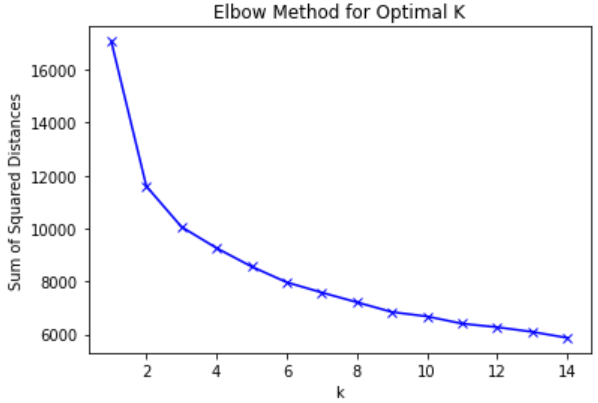

K의 값은 주어진 것이 없기 때문에 적절한 값의 K를 찾아야 한다.

주어진 코드로 Elbow Method를 구현하면 위의 그래프를 얻을 수 있다.

그룹의 개수 K가 늘어날수록 중심과 개별 데이터간의 거리가 짧아진다.

보통 그래프의 기울기가 완만해지는 정도의 K를 활용하는 것이 일반적이다.

다만 우리가 활용하는 의료 데이터에서 진단은 YES or NO로 이루어져야 한다.

따라서 K는 2가 될 수 밖에 없으며 2개의 그룹으로 나누게 된다.

**5\. K-평균 군집화 및 시각화**

```
## K-means Clustering
k2_means = KMeans(n_clusters=2, random_state=42)
k2_means.fit(df)
clusters = k2_means.labels_

lab_series = pd.Series(clusters)


## PCA 후 시각화
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

# 데이터프레임 생성


## 원래 Label 그래프
org_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
org_df['Diagnosis'] = pd.Series(label)

sns.scatterplot(data=org_df,x='PC1',y='PC2', hue='Diagnosis')
plt.title('Original Diagnosis')
plt.show()
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
pc_df['Cluster'] = lab_series

# 그래프 그리기
sns.scatterplot(data=pc_df,x='PC1',y='PC2', hue='Cluster')
plt.title('K-means Clustering')
plt.show()
```

위에서 말한대로 군집화는 2개의 그룹으로 진행하였다.

그룹화를 진행한 후에는 PCA를 통해 차원을 2차원으로 축소했다.

그래야 2차원 평면 그래프로 분류 결과를 확인할 수 있기 때문이다.

**6\. 결과 확인**

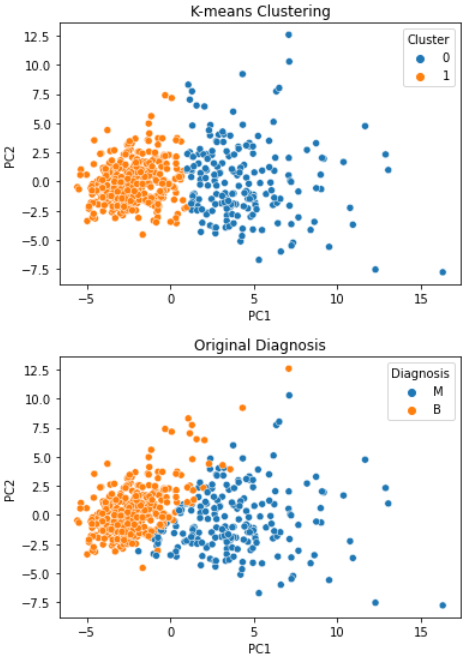

위의 시각화 코드를 통해 얻은 그래프는 위와 같다.

첫번째 그래프가 K-평균 군집화를 통해 분류한 결과고

두번째 그래프가 실제 진단받은 결과다.

분류가 기본적으로는 잘되어있으나 경계선에서 다소 오차가 있음을 알 수 있다.

분류의 정확도를 알기 위해 다음의 코드를 실행할 수 있다.

```
agg_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
agg_df['Cluster'] = lab_series
agg_df['Diagnosis'] = pd.Series(label)

res = agg_df.iloc[:,-2:]

res['Cluster'] = res['Cluster'].replace(0, 'M')
res['Cluster'] = res['Cluster'].replace(1, 'B')

correct = (res['Cluster']==res['Diagnosis']).sum()
wrong = (res['Cluster']!=res['Diagnosis']).sum()
total = correct + wrong

Acc = correct/total
print(Acc)
```

K-평균 군집화의 결과는 실제 진단결과와 90.5% 일치하는 것으로 나타났다.

모두 행복하길

\-끝-